In [11]:
import pandas as pd
import numpy as np
import pandas.io.sql as pd_sql
import sqlite3 as sql
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
%matplotlib notebook

In [12]:
con = sql.connect(r'c:\users\rebecca\.spyder-py3\movies.db') 

movies = pd_sql.read_sql('select * from finalMovies_20180804', con, index_col='index')


## ------------------------
## Feature Selection
## ------------------------

In [13]:
test2 = movies[(movies['Revenue_Real']>0)&(movies['Budget_Real']>0) &
              (movies['Length']>0) & (movies['Rating_RT']>0)&
              (movies['Rating_IMDB']>0)&(movies['Rating_Metacritic']>0)]
#test2 = movies[(movies['Revenue_Real']>100000) & (movies['Budget_Real']>0)]

#Make binary variable for if movie made at least 2x budget
test2['Profit_Bucket_Binary']=np.where(test2['Profit_Bucket']=='<1x', 0, np.where(test2['Profit_Bucket']=='[1-2x)', \
    0, np.where(test2['Profit_Bucket']=='[2-3x)', 1, np.where(test2['Profit_Bucket']=='[3-4x)', \
                       1, np.where(test2['Profit_Bucket']=='[4-5x)', 1, np.where(test2['Profit_Bucket']=='>=5x', 1, ''))))))

#Put zero where null
test2['Revenue_Actor_Real']=movies['Revenue_Actor_Real'].apply(lambda x: 0 if pd.isnull(x) else x)
test2['Revenue_Director_Real']=movies['Revenue_Director_Real'].apply(lambda x: 0 if pd.isnull(x) else x)
test2['Revenue_Writer_Real']=movies['Revenue_Writer_Real'].apply(lambda x: 0 if pd.isnull(x) else x)


C:\Users\Rebecca\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\Rebecca\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Rebecca\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [71]:
features = test2[["Budget_Real", "Holiday", "Summer", "Spring", "Fall", "Winter",
'Rating_RT', 'Rating_IMDB', 'Rating_Metacritic',           
'isCollection','Length',
                  
'Genre_Drama','Genre_Comedy','Genre_Action_Adventure','Genre_Thriller_Horror','Genre_Romance',
 'Genre_Crime_Mystery','Genre_Animation','Genre_Scifi','Genre_Documentary','Genre_Other',
                  
'Rated_G_PG','Rated_PG-13','Rated_R','Rated_Other',
                  
'Comp_Disney','Comp_DreamWorks','Comp_Fox','Comp_Lionsgate','Comp_MGM',
 'Comp_Miramax','Comp_Paramount','Comp_Sony','Comp_Universal','Comp_WarnerBros','Comp_Other',  
                  
'Revenue_Actor_Real','Revenue_Director_Real', 'Revenue_Writer_Real',
'Nominated_Major', 'Nominated_Minor', 'Won_Major', 'Won_Minor'
]]
labels = test2["Profit_Bucket_Binary"]

In [16]:
features.describe()
labels.describe()

,Budget_Real,Holiday,Summer,Spring,Fall,Winter,Rating_RT,Rating_IMDB,Rating_Metacritic,isCollection,...,Comp_Universal,Comp_WarnerBros,Comp_Other,Revenue_Actor_Real,Revenue_Director_Real,Revenue_Writer_Real,Nominated_Major,Nominated_Minor,Won_Major,Won_Minor
count,3.677000e+03,3677.000000,3677.000000,3677.000000,3677.000000,3677.000000,3677.000000,3677.000000,3677.000000,3677.000000,...,3677.000000,3677.000000,3677.000000,3.677000e+03,3.677000e+03,3.677000e+03,3677.000000,3677.000000,3677.000000,3677.000000
mean,4.472849e+07,0.165624,0.308676,0.163448,0.217569,0.144683,52.307044,6.356968,52.862619,0.185749,...,0.109328,0.134893,0.880881,3.196979e+09,2.778182e+08,7.029204e+08,0.251564,14.044602,0.089475,6.385640
std,5.183101e+07,0.371793,0.462010,0.369825,0.412649,0.351829,27.277193,0.997736,17.735167,0.388957,...,0.312093,0.341655,0.323972,3.418203e+09,6.432190e+08,2.241873e+09,0.763757,28.020447,0.530763,17.051953
min,1.512098e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.600000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,9.623039e+06,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000,5.800000,40.000000,0.000000,...,0.000000,0.000000,1.000000,6.474352e+08,0.000000e+00,0.000000e+00,0.000000,1.000000,0.000000,0.000000
50%,2.625752e+07,0.000000,0.000000,0.000000,0.000000,0.000000,52.000000,6.400000,53.000000,0.000000,...,0.000000,0.000000,1.000000,2.135347e+09,9.473719e+06,4.154218e+07,0.000000,5.000000,0.000000,1.000000
75%,5.932993e+07,0.000000,1.000000,0.000000,0.000000,0.000000,77.000000,7.000000,66.000000,0.000000,...,0.000000,0.000000,1.000000,4.648293e+09,2.461751e+08,5.566348e+08,0.000000,13.000000,0.000000,5.000000
max,4.325717e+08,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000,9.100000,99.000000,1.000000,...,1.000000,1.000000,1.000000,2.476678e+10,7.075528e+09,5.015983e+10,10.000000,326.000000,11.000000,235.000000


In [19]:
from sklearn.preprocessing import Imputer, LabelEncoder, OneHotEncoder

label_encoder = LabelEncoder()
yc = label_encoder.fit_transform(labels)
#print(yc)
#print(labels)

In [28]:
print(label_encoder.classes_)
features.shape

['0' '1']


(3677, 43)

In [4]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()

In [5]:
model.fit(features, labels)
model.feature_importances_

array([0.13611552, 0.        , 0.00335207, 0.00167517, 0.01771242,
       0.0113436 , 0.02213068, 0.07681007, 0.01765749, 0.06130868,
       0.0500952 , 0.03212879, 0.01682892, 0.01618432, 0.02132884,
       0.00481972, 0.00297746, 0.0027269 , 0.0059546 , 0.0076241 ,
       0.02139505, 0.00896433, 0.01558131, 0.02533077, 0.02705566,
       0.01969837, 0.        , 0.0165809 , 0.01264497, 0.        ,
       0.00785362, 0.00264975, 0.01090469, 0.01241495, 0.        ,
       0.00854845, 0.05135622, 0.03137053, 0.05955137, 0.00463608,
       0.09660677, 0.01118375, 0.04689793])

<IPython.core.display.Javascript object>


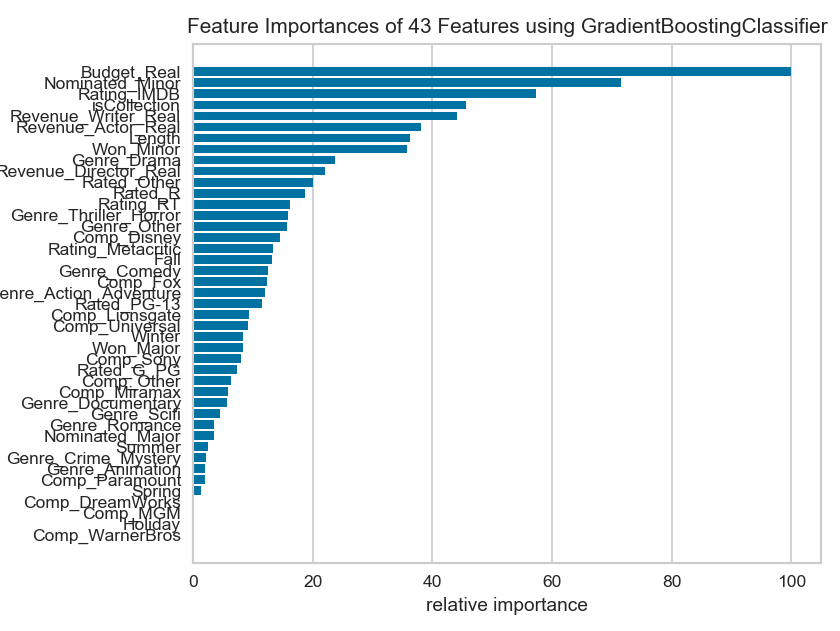

In [6]:
%matplotlib notebook
from yellowbrick.features import FeatureImportances

oz=FeatureImportances(GradientBoostingClassifier())
oz.fit(features, labels)
oz.poof()

<IPython.core.display.Javascript object>


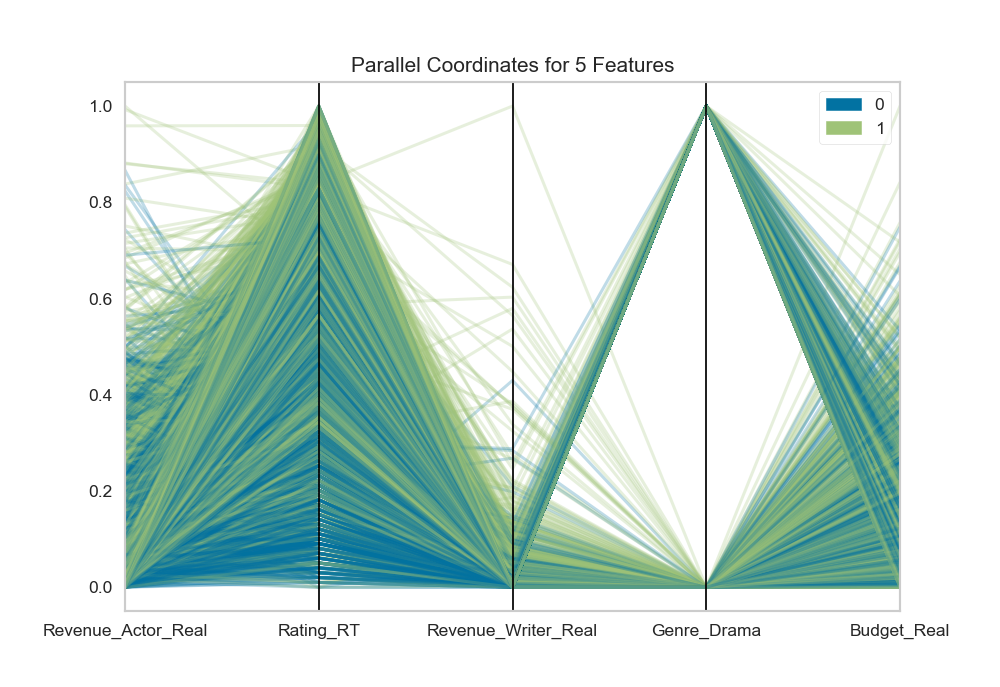

In [10]:
from yellowbrick.features import ParallelCoordinates, RadViz
oz = ParallelCoordinates(normalize='minmax') #minmax, standard
oz.fit_transform(test2[['Revenue_Actor_Real', 'Rating_RT', 
                        'Revenue_Writer_Real', 'Genre_Drama', 'Budget_Real']], test2['Profit_Bucket_Binary']) 
oz.poof()

In [69]:
from yellowbrick.features import ParallelCoordinates, RadViz
oz = ParallelCoordinates()#classes=label_encoder.classes_, features=features)
#X=features
print(features.shape)
print(yc.shape)
oz.fit_transform(features, labels)
oz.poof()


(3677,)
(3677,)


IndexError: tuple index out of range

In [ ]:
features = ["Budget_Real"]
classes = ["Profit_Bucket_Binary"]

# Extract the numpy arrays from the data frame
X = test3[features]#.as_matrix()
y = test3[classes]#.as_matrix()
# Import the visualizer
from yellowbrick.features import RadViz

# Instantiate the visualizer
visualizer = RadViz(classes=classes, features=features)

visualizer.fit(X, y)      # Fit the data to the visualizer
visualizer.transform(X)   # Transform the data
visualizer.poof() 

<IPython.core.display.Javascript object>


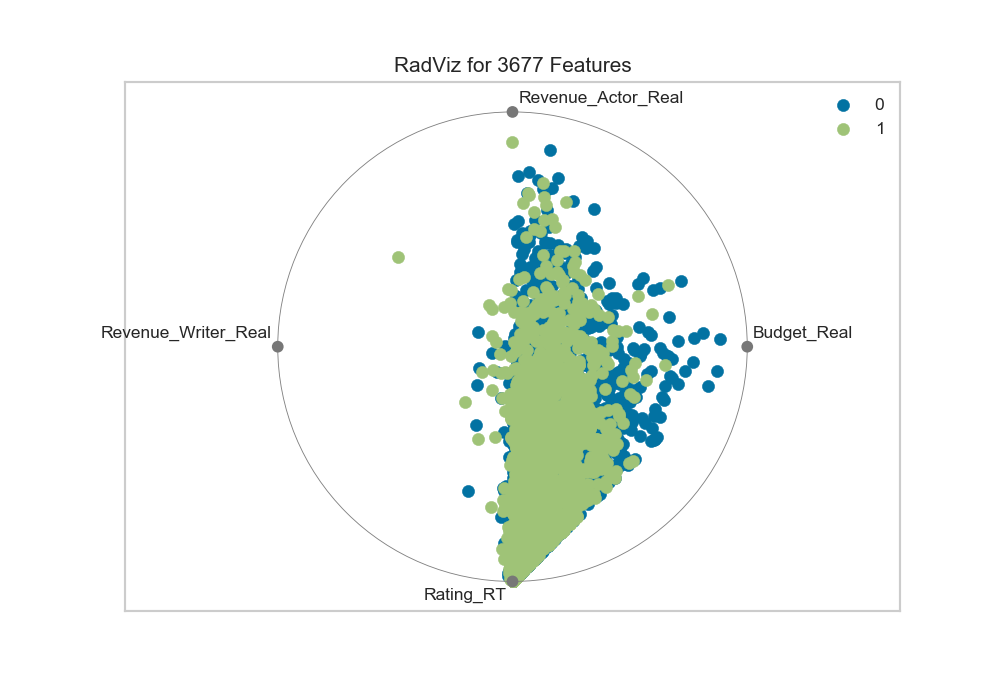

In [67]:
yc = label_encoder.fit_transform(test2['Profit_Bucket_Binary'])
features = test2[[('Budget_Real'), 'Revenue_Actor_Real', 'Revenue_Writer_Real', 'Rating_RT']]
oz = RadViz(classes=label_encoder.classes_, features=features)


oz.fit(features, yc)
oz.poof()
#print(features.shape)

<IPython.core.display.Javascript object>


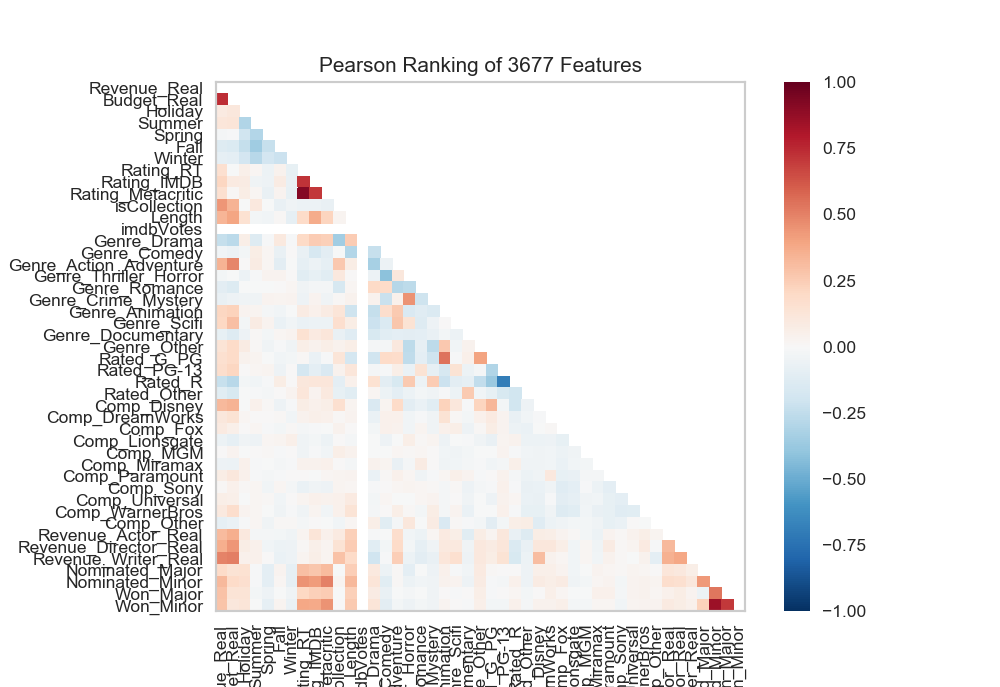

In [82]:
from yellowbrick.features import Rank2D
features = test2[["Revenue_Real","Budget_Real", "Holiday", "Summer", "Spring", "Fall", "Winter",
'Rating_RT', 'Rating_IMDB', 'Rating_Metacritic',           
'isCollection','Length', 'imdbVotes',
'Genre_Drama','Genre_Comedy','Genre_Action_Adventure','Genre_Thriller_Horror','Genre_Romance',
 'Genre_Crime_Mystery','Genre_Animation','Genre_Scifi','Genre_Documentary','Genre_Other',      
'Rated_G_PG','Rated_PG-13','Rated_R','Rated_Other',        
'Comp_Disney','Comp_DreamWorks','Comp_Fox','Comp_Lionsgate','Comp_MGM',
 'Comp_Miramax','Comp_Paramount','Comp_Sony','Comp_Universal','Comp_WarnerBros','Comp_Other',            
'Revenue_Actor_Real','Revenue_Director_Real', 'Revenue_Writer_Real',
'Nominated_Major', 'Nominated_Minor', 'Won_Major', 'Won_Minor']]
oz = Rank2D(features=features)
oz.fit_transform(features, labels)
oz.poof()

In [85]:
features.describe()

,Revenue_Real,Budget_Real,Holiday,Summer,Spring,Fall,Winter,Rating_RT,Rating_IMDB,Rating_Metacritic,...,Comp_Universal,Comp_WarnerBros,Comp_Other,Revenue_Actor_Real,Revenue_Director_Real,Revenue_Writer_Real,Nominated_Major,Nominated_Minor,Won_Major,Won_Minor
count,3.677000e+03,3.677000e+03,3677.000000,3677.000000,3677.000000,3677.000000,3677.000000,3677.000000,3677.000000,3677.000000,...,3677.000000,3677.000000,3677.000000,3.677000e+03,3.677000e+03,3.677000e+03,3677.000000,3677.000000,3677.000000,3677.000000
mean,1.251852e+08,4.472849e+07,0.165624,0.308676,0.163448,0.217569,0.144683,52.307044,6.356968,52.862619,...,0.109328,0.134893,0.880881,3.196979e+09,2.778182e+08,7.029204e+08,0.251564,14.044602,0.089475,6.385640
std,2.238523e+08,5.183101e+07,0.371793,0.462010,0.369825,0.412649,0.351829,27.277193,0.997736,17.735167,...,0.312093,0.341655,0.323972,3.418203e+09,6.432190e+08,2.241873e+09,0.763757,28.020447,0.530763,17.051953
min,1.210501e+00,1.512098e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.600000,1.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,7.642207e+06,9.623039e+06,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000,5.800000,40.000000,...,0.000000,0.000000,1.000000,6.474352e+08,0.000000e+00,0.000000e+00,0.000000,1.000000,0.000000,0.000000
50%,4.406735e+07,2.625752e+07,0.000000,0.000000,0.000000,0.000000,0.000000,52.000000,6.400000,53.000000,...,0.000000,0.000000,1.000000,2.135347e+09,9.473719e+06,4.154218e+07,0.000000,5.000000,0.000000,1.000000
75%,1.415151e+08,5.932993e+07,0.000000,1.000000,0.000000,0.000000,0.000000,77.000000,7.000000,66.000000,...,0.000000,0.000000,1.000000,4.648293e+09,2.461751e+08,5.566348e+08,0.000000,13.000000,0.000000,5.000000
max,3.425755e+09,4.325717e+08,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000,9.100000,99.000000,...,1.000000,1.000000,1.000000,2.476678e+10,7.075528e+09,5.015983e+10,10.000000,326.000000,11.000000,235.000000


<IPython.core.display.Javascript object>


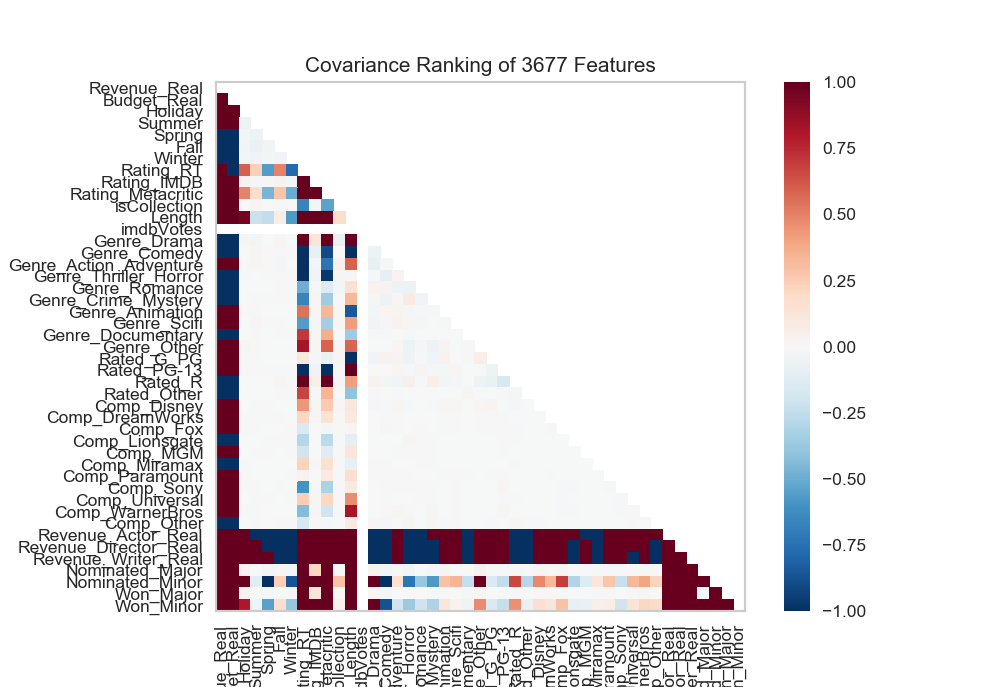

In [84]:
oz = Rank2D(features=features, algorithm = 'covariance')
oz.fit_transform(features, labels)
oz.poof()

In [122]:
from sklearn.model_selection import train_test_split as tts

from sklearn.naive_bayes import MultinomialNB, GaussianNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, SGDClassifier


from yellowbrick.classifier import ROCAUC, ClassificationReport, ConfusionMatrix

In [87]:
features = test2[["Budget_Real", "Holiday", "Summer", "Spring", "Fall", "Winter",
'Rating_RT', 'Rating_IMDB', 'Rating_Metacritic',           
'isCollection','Length',
                  
'Genre_Drama','Genre_Comedy','Genre_Action_Adventure','Genre_Thriller_Horror','Genre_Romance',
 'Genre_Crime_Mystery','Genre_Animation','Genre_Scifi','Genre_Documentary','Genre_Other',
                  
'Rated_G_PG','Rated_PG-13','Rated_R','Rated_Other',
                  
'Comp_Disney','Comp_DreamWorks','Comp_Fox','Comp_Lionsgate','Comp_MGM',
 'Comp_Miramax','Comp_Paramount','Comp_Sony','Comp_Universal','Comp_WarnerBros','Comp_Other',  
                  
'Revenue_Actor_Real','Revenue_Director_Real', 'Revenue_Writer_Real',
'Nominated_Major', 'Nominated_Minor', 'Won_Major', 'Won_Minor'
]]
labels = test2["Profit_Bucket_Binary"]

X_train, X_test, y_train, y_test = tts(features, labels, test_size=0.2)

<IPython.core.display.Javascript object>


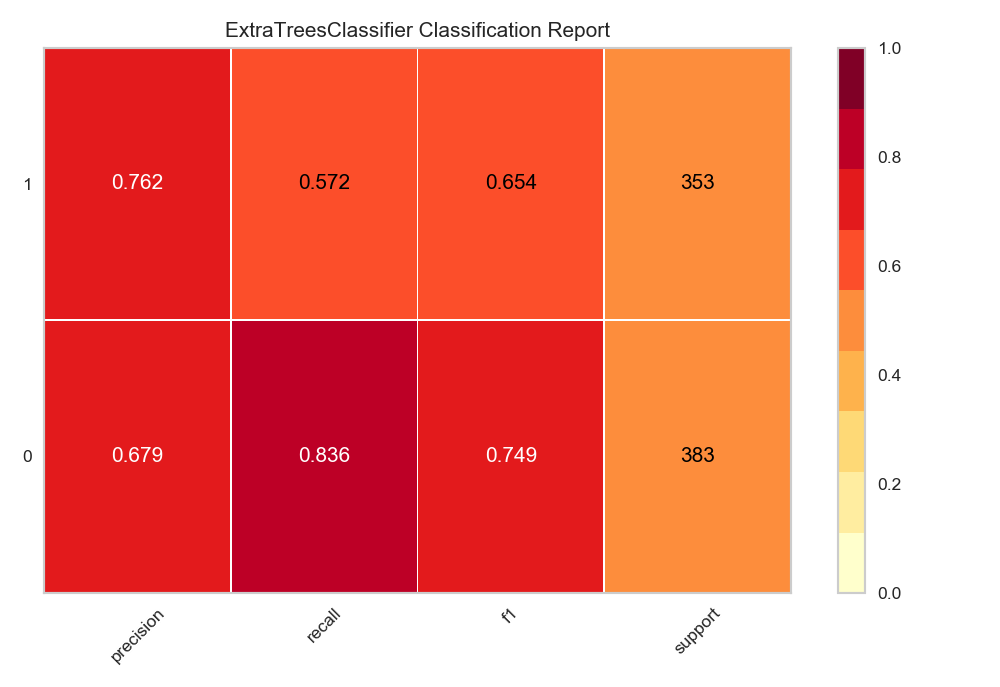

In [125]:
model = ExtraTreesClassifier()

oz = ClassificationReport(model, support=True)
oz.fit(X_train, y_train)
oz.score(X_test, y_test)
oz.poof()

<IPython.core.display.Javascript object>


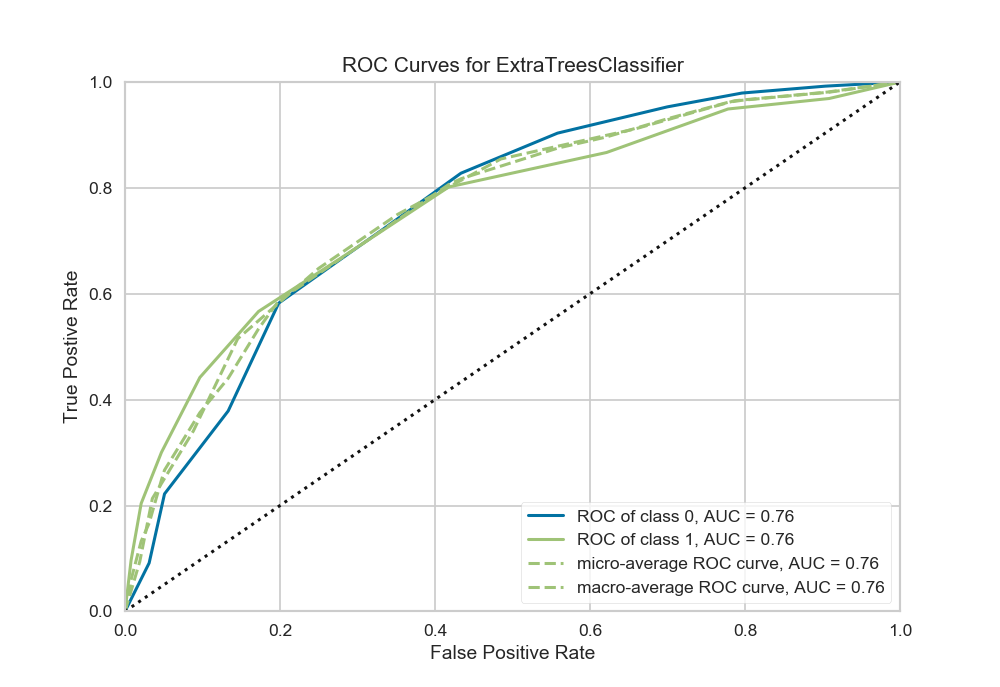

In [126]:
label_encoder = LabelEncoder()
yc = label_encoder.fit_transform(labels)

oz = ROCAUC(model, support=True, classes=label_encoder.classes_)
oz.fit(X_train, y_train)
oz.score(X_test, y_test)
oz.poof()

<IPython.core.display.Javascript object>


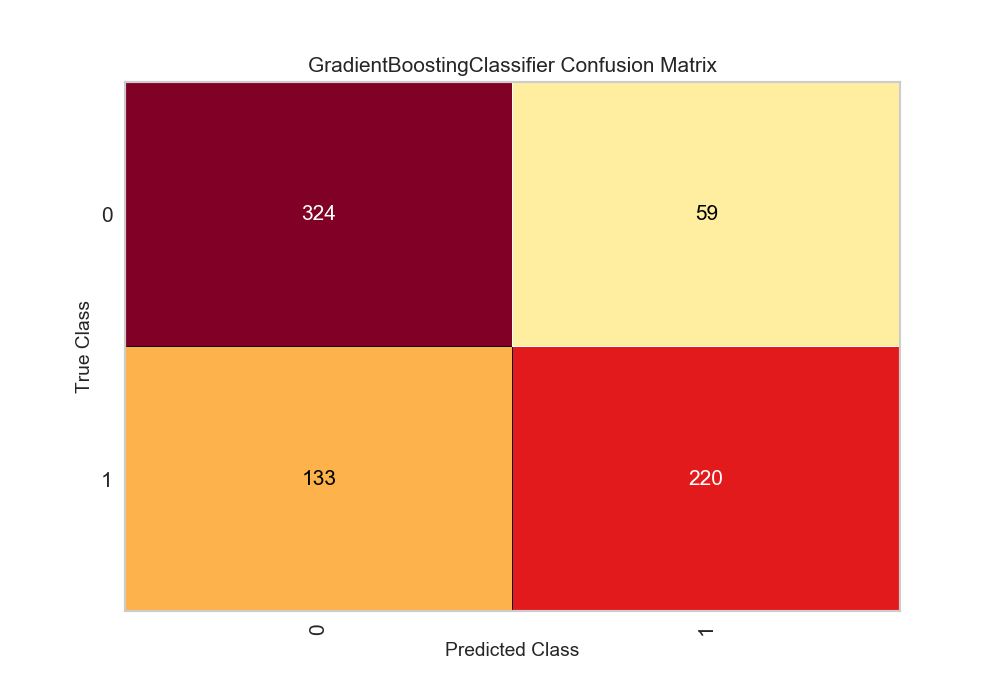

In [111]:
oz = ConfusionMatrix(model, support=True)
oz.fit(X_train, y_train)
oz.score(X_test, y_test)
oz.poof()

In [121]:

feature_importances = pd.DataFrame(model.feature_importances_,
   index = X_train.columns,columns=['importance']).sort_values('importance',
    ascending=False)
(feature_importances.head(10))

,importance
Budget_Real,0.135538
Rating_IMDB,0.081734
Nominated_Minor,0.074821
Revenue_Writer_Real,0.074194
Length,0.067335
isCollection,0.056015
Revenue_Actor_Real,0.052451
Won_Minor,0.048958
Revenue_Director_Real,0.036752
Rating_Metacritic,0.035627


<IPython.core.display.Javascript object>


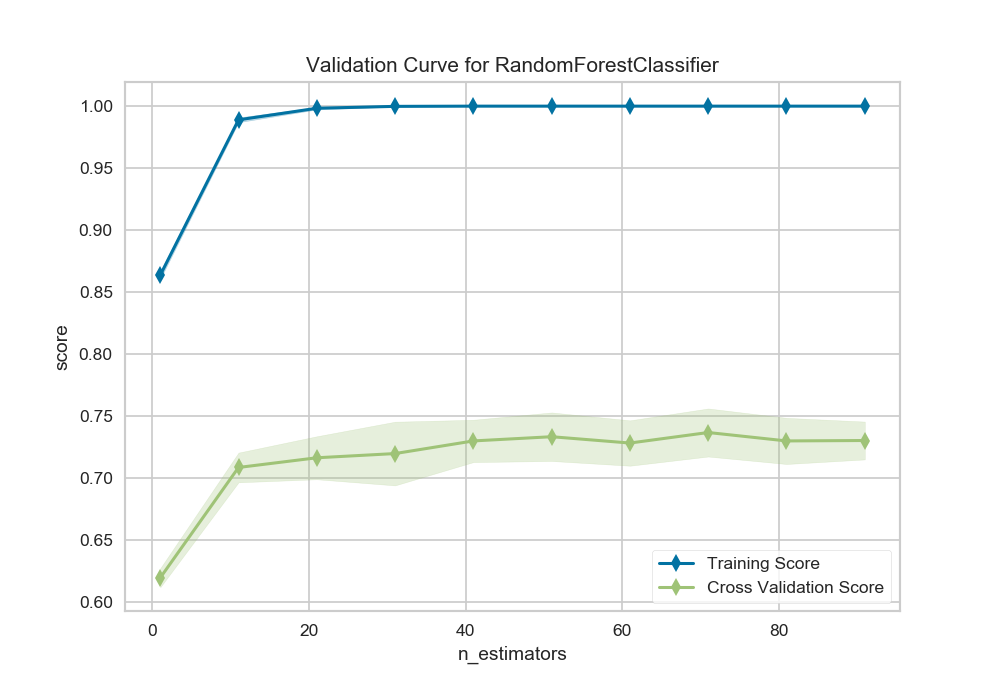

In [115]:
from yellowbrick.model_selection import ValidationCurve

oz = ValidationCurve(RandomForestClassifier(), param_name='n_estimators', param_range=np.arange(1, 100, 10))
oz.fit(X_train, y_train)
oz.poof()

<IPython.core.display.Javascript object>


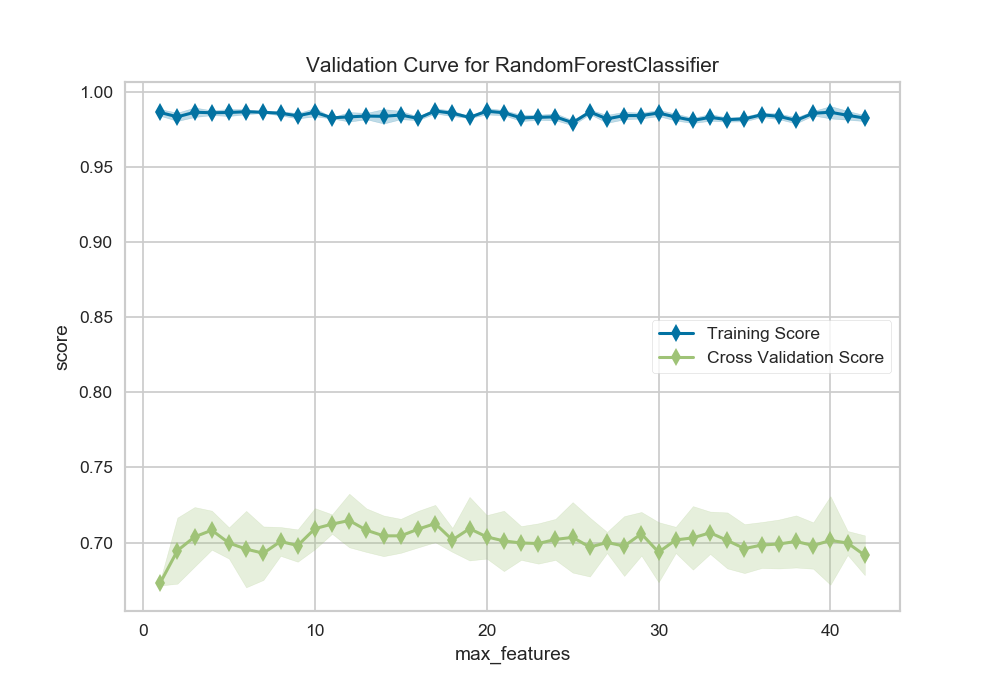

In [119]:
from yellowbrick.model_selection import ValidationCurve

oz = ValidationCurve(RandomForestClassifier(), param_name='max_features', param_range=np.arange(1, 43, 1))
oz.fit(X_train, y_train)
oz.poof()